In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
train_data=pd.read_csv('mobile_price_range_data.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
train_data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


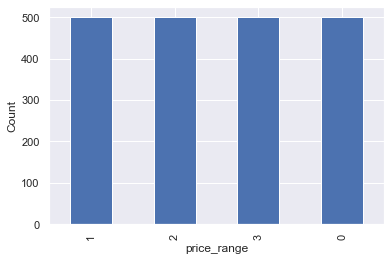

In [10]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
#classes
sns.set()
price_plot=train_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

In [15]:
train_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [16]:
train_data.isnull

<bound method DataFrame.isnull of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [20]:
train_data.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [21]:
train_data.duplicated().sum()

0

In [23]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [24]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [25]:
#checking for outliers

#from pandas.io.formats.style_render import DataFrame
for i in train_data.columns[5:11]:
    q1=train_data[i].quantile (0.25)
    q3=train_data[i].quantile (0.75)
    IQR=q3-q1
    ll=q1-(1.5*IQR)
    ul=q3+(1.5*IQR)
    outliers=[x for x in train_data[i] if x<ll or x>ul]
    print(len(outliers))

0
0
0
0
0
0


In [26]:
train_data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [28]:
x=train_data.iloc[:,0:len(train_data.columns)-1]
y=train_data['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2000, 20)
(2000,)


## DATA VISUALIZATION

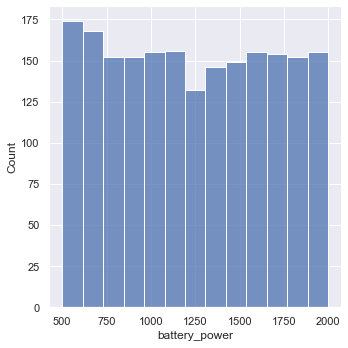

In [30]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["battery_power"])

plt.show()

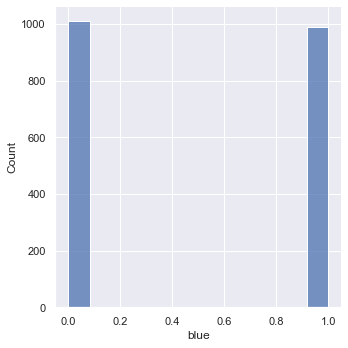

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["blue"])

plt.show()

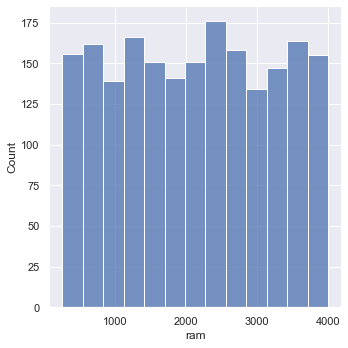

In [32]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["ram"])

plt.show()

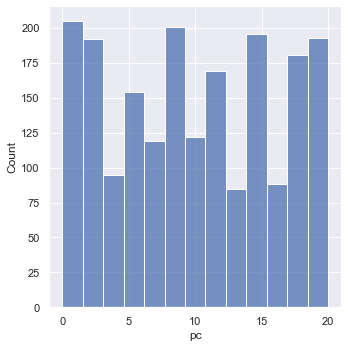

In [33]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["pc"])

plt.show()

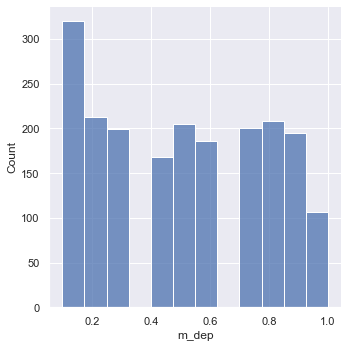

In [34]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data["m_dep"])

plt.show()

C:\Users\SHIVANI THALAPAKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


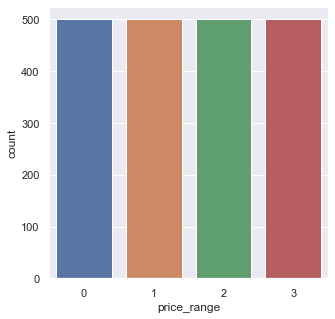

In [35]:
sns.countplot(train_data['price_range'])
plt.show()

## SPLITTING DATA

In [38]:
x=train_data.iloc[:,0:len(train_data.columns)-1]
y=train_data['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2000, 20)
(2000,)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=39)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


## LOGISTIC REGRESSION

In [40]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
lgc= LogisticRegression()
lgc.fit(x_train,y_train)
print('Train Score',lgc.score(x_train,y_train))
print('Test Score',lgc.score(x_test,y_test))
ypred_lgc = lgc.predict(x_test)
#confusion marrix
print(confusion_matrix(y_test,ypred_lgc))
print(classification_report(y_test,ypred_lgc))

Train Score 0.636
Test Score 0.668
[[115  24   0   0]
 [ 24  66  23   2]
 [  0  26  58  37]
 [  0   1  29  95]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.56      0.57      0.57       115
           2       0.53      0.48      0.50       121
           3       0.71      0.76      0.73       125

    accuracy                           0.67       500
   macro avg       0.66      0.66      0.66       500
weighted avg       0.66      0.67      0.67       500



C:\Users\SHIVANI THALAPAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN CLASSIFICATION

In [42]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=11)
knn1.fit(x_train,y_train)
print('Train Score',knn1.score(x_train,y_train))
print('Test Score',knn1.score(x_test,y_test))
ypred_knn1 = knn1.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
#confusion matrix
cm = confusion_matrix(y_test,ypred_knn1)
print(cm)
print(classification_report(y_test,ypred_knn1))

Train Score 0.9466666666666667
Test Score 0.936
[[134   5   0   0]
 [  5 105   5   0]
 [  0   6 113   2]
 [  0   0   9 116]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.91      0.91      0.91       115
           2       0.89      0.93      0.91       121
           3       0.98      0.93      0.95       125

    accuracy                           0.94       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500



## SVM CLASSIFIER USING LINEAR

In [44]:
from sklearn.svm import SVC
svc_m1 = SVC(kernel='linear',C=10)
svc_m1.fit(x_train,y_train)
print('Train Score',svc_m1.score(x_train,y_train))
print('Test Score',svc_m1.score(x_test,y_test))
ypred_svc_m1 = svc_m1.predict(x_test)
#confusion matrix
cm = confusion_matrix(y_test,ypred_svc_m1)
print("confusion Matrix",cm)
cls_rep = classification_report(y_test,ypred_svc_m1)
print(cls_rep)

Train Score 0.9906666666666667
Test Score 0.966
confusion Matrix [[138   1   0   0]
 [  2 111   2   0]
 [  0   2 115   4]
 [  0   0   6 119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       139
           1       0.97      0.97      0.97       115
           2       0.93      0.95      0.94       121
           3       0.97      0.95      0.96       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



## SVM CLASIFIER USING RBF

In [45]:
#SVM Classifier using rbf
from sklearn.svm import SVC
svc_m2 = SVC(kernel='rbf',C=10)
svc_m2.fit(x_train,y_train)
print('Train Score',svc_m2.score(x_train,y_train))
print('Test Score',svc_m2.score(x_test,y_test))
ypred_svc_m2 = svc_m2.predict(x_test)
#confusion matrix
cm = confusion_matrix(y_test,ypred_svc_m2)
print("confusion Matrix",cm)
cls_rep = classification_report(y_test,ypred_svc_m2)
print(cls_rep)

Train Score 0.9673333333333334
Test Score 0.958
confusion Matrix [[135   4   0   0]
 [  3 108   4   0]
 [  0   2 118   1]
 [  0   0   7 118]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       139
           1       0.95      0.94      0.94       115
           2       0.91      0.98      0.94       121
           3       0.99      0.94      0.97       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



## RANDOM FOREST CLASSIFIER

In [46]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
#rfc=RandomForestClassifier(bootstrap= True,max_depth= 7,max_features= 15,min_samples_leaf= 3,min_samples_split= 10,n_estimators= 200,random_state=7)
rfc=RandomForestClassifier()
rfc.fit(x_train , y_train)
print('Train Score',rfc.score(x_train,y_train))
print('Test Score',rfc.score(x_test,y_test))
ypred_rfc= svc_m1.predict(x_test)
cm = confusion_matrix(y_test,ypred_rfc)
print("confusion Matrix",cm)
cls_rep = classification_report(y_test,ypred_rfc)
print(cls_rep)

Train Score 1.0
Test Score 0.906
confusion Matrix [[138   1   0   0]
 [  2 111   2   0]
 [  0   2 115   4]
 [  0   0   6 119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       139
           1       0.97      0.97      0.97       115
           2       0.93      0.95      0.94       121
           3       0.97      0.95      0.96       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



## DECISION TREE CLASSIFIER

In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)
print('Train Score',dtc.score(x_train,y_train))
print('Test Score',dtc.score(x_test,y_test))
ypred_dtc= svc_m1.predict(x_test)
#confusion matrix
cm = confusion_matrix(y_test,ypred_dtc)
print("confusion Matrix",cm)
cls_rep = classification_report(y_test,ypred_dtc)
print(cls_rep)

Train Score 1.0
Test Score 0.834
confusion Matrix [[138   1   0   0]
 [  2 111   2   0]
 [  0   2 115   4]
 [  0   0   6 119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       139
           1       0.97      0.97      0.97       115
           2       0.93      0.95      0.94       121
           3       0.97      0.95      0.96       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



## RANDOM FOREST CLASSIFIER

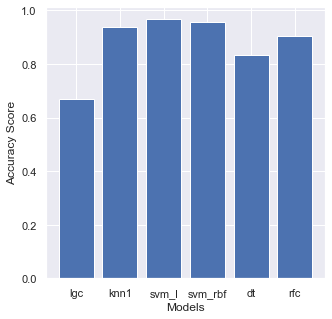

In [50]:
plt.bar(x=['lgc','knn1','svm_l' ,'svm_rbf','dt', 'rfc'],height=[lgc.score(x_test,y_test),knn1.score(x_test,y_test),svc_m1.score(x_test,y_test),svc_m2.score(x_test,y_test),dtc.score(x_test,y_test),rfc.score(x_test,y_test)])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

In [54]:
#building the model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

## SVM Linear Classifier is giving the best accuracy model with 0.96(i.e; 96% accuracy)